# Линейная алгебра. Лабораторная работа 1, осень 2020, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [41]:
# Запустите этот код
import numpy as np
import sys
sys.setrecursionlimit(1000000)

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [42]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [43]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [44]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [45]:
a = [1, 2, 3, 4, 5]
np.diag(a)


array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [46]:
np.trace(np.diag([1, 2, 3, 4, 5]))

15

In [71]:
a = [1, 2, 3, 4, 5]
sla.inv(np.diag(a))


array([[ 1.        ,  0.        ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [47]:
x = np.random.random((4, 5))
print(x)

[[0.05068472 0.3765903  0.40519255 0.46077562 0.4692125 ]
 [0.45788519 0.39398596 0.57065355 0.23393792 0.41677258]
 [0.87980135 0.4026147  0.19760876 0.57119043 0.14688948]
 [0.19775155 0.83309678 0.00308691 0.57476552 0.2715615 ]]


In [48]:
y = x[1:3, 0:2]
np.linalg.det(y)

-0.1622780694402515

In [49]:
np.dot(np.matrix.transpose(x), x)

array([[1.02538388, 0.71845485, 0.45629778, 0.74666587, 0.39755117],
       [0.71845485, 1.15319404, 0.45955296, 0.97449685, 0.6262803 ],
       [0.45629778, 0.45955296, 0.52888523, 0.43484684, 0.4578191 ],
       [0.74666587, 0.97449685, 0.43484684, 0.92365503, 0.55368664],
       [0.39755117, 0.6262803 , 0.4578191 , 0.55368664, 0.48918192]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [50]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    '''

    # Your code here
    a, b = np.shape(X)
    if a != b:
        return 'ValueError'
    else:
        if a == 1:
            return X[0][0]
        m = X[:, 0]
        where = -1
        for i in range(len(m)):
            if m[i] != 0:
                where = i
                break
        if where == -1:
            return 0
        nonzerostr = X[where, :]
        for i in range(a):
            if i != where:
                const = X[i][0] / X[where][0]
                X[i][0] -= X[where][0] * const
                for q in range(1, a):
                    X[i][q] -= X[where][q] * const
        a0 = X[where][0]
        X = np.delete(X, (0), axis=1)
        X = np.delete(X, (where), axis=0)
        if where % 2 == 0:
            return my_det(X) * a0
        else:
            return  -my_det(X) * a0

Простая проверка:

In [51]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0] ])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [52]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

113 µs ± 922 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
663 µs ± 22.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.9 ms ± 5.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
471 ms ± 21.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
95.9 ms ± 43.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.8 s ± 790 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


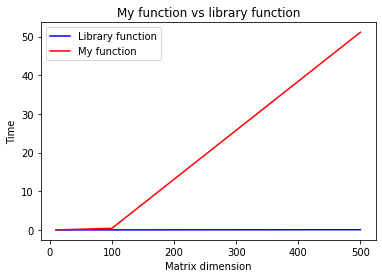

In [53]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 500]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

здесь хочется отметить, что у меня почему-то вылезала ошибка переполнения памяти, при dimensions = [10, 100, 1000]. Но, после изменения последнего параметра, все работает лучше. Вообще, не очень понятно, почему так происходит, на моем компьютере остается еще много памяти. Конечно, функция, считающая определитель рекурсивна - но размер рекурсии я увеличил.

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

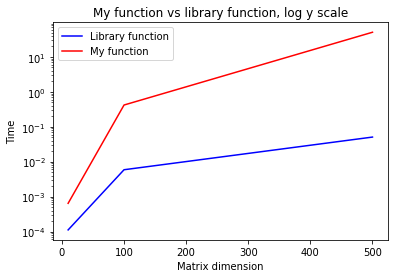

In [54]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [55]:
x = np.array([[1,0], [10 ** 20, 1]])
y = np.array([[10 ** (-20), 1], [0, 1 - 10 ** 20]])
print(x . dot(y))
x1 = np.array([[1.,0.], [10. ** 20, 1.]])
y1 = np.array([[10. ** (-20), 1.], [0., 1. - 10. ** 20]])
print(x1.dot(y1))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [56]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    for i in range(dim):
        P[0][i] = 1
    for i in range(dim):
        P[i][0] = 1
    for i in range(1, dim):
        for j in range(1, dim):
            P[i][j] = P[i-1][j] +P[i][j - 1]
    P = P.astype(int)
    return P
print(sla.pascal(10))
print(my_pascal(10))

[[    1     1     1     1     1     1     1     1     1     1]
 [    1     2     3     4     5     6     7     8     9    10]
 [    1     3     6    10    15    21    28    36    45    55]
 [    1     4    10    20    35    56    84   120   165   220]
 [    1     5    15    35    70   126   210   330   495   715]
 [    1     6    21    56   126   252   462   792  1287  2002]
 [    1     7    28    84   210   462   924  1716  3003  5005]
 [    1     8    36   120   330   792  1716  3432  6435 11440]
 [    1     9    45   165   495  1287  3003  6435 12870 24310]
 [    1    10    55   220   715  2002  5005 11440 24310 48620]]
[[    1     1     1     1     1     1     1     1     1     1]
 [    1     2     3     4     5     6     7     8     9    10]
 [    1     3     6    10    15    21    28    36    45    55]
 [    1     4    10    20    35    56    84   120   165   220]
 [    1     5    15    35    70   126   210   330   495   715]
 [    1     6    21    56   126   252   462   792  128

Чему равен её определитель? Обязательно объясните свой ответ.

----
Из 10 строки вычтем 9, из 9 строки вычтем 8 ... из второй вычтем первую. После этого проделаем то же самое со столбцами -- из 10 столбца вычтем 9 ... из второго столбца вычтем первый. Понятно, что в силу того, что C(n+1,m)=C(n,m-1)+C(n,m), после всех преобразований в правом нижнем углу получится матрица Паскаля только лишь размера 9 * 9. Угол же квадрата 10 * 10 будет полностью состоять из нулей, кроме угловой единицы. Поэтому рекурсивная формула такова: det(P(n)) = 1 * det(P(n - 1)). det(P(1)) = 1. Значит, ее определитель равен 1.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [57]:
sla.det(sla.pascal(30))

4.333497765590411e+51

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [58]:
def prod_and_sq_sum(A):
    dia = np.diagonal(A)
    x = np.prod(dia)
    y = np.dot(dia, dia)
    return x, y
m = np.array([[1,2,3],[4,5,6],[7,8,9]])
prod_and_sq_sum(m)

(45, 107)

**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [59]:
def f(A, B, k):
    if k >= len(A.T):
        x = np.dot(B, A.T)
    else:
        A = A[:k,:]
        B = B[:k,:]
        x = np.dot(B, A.T)
    return x.T
m = np.array([[2,4],[14,18]])
n = np.array([[1,2],[3,4]])
k = 2
print(f(m, n, k))

[[ 10  22]
 [ 50 114]]


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [60]:
def get_diag(A,B):
    return np.sum(A * B.T, axis=1)
m = np.array([[2,4],[14,18]])
n = np.array([[1,2],[3,4]])
print(get_diag(m, n))

[ 14 100]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [61]:
import math
def shrink_rotate(x, a, coef=1., angle=0.):
    complex = (math.cos(angle) + math.sin(angle) * 1j)  * coef
    new_complex = (x - a) * complex
    return a + (x - a) * complex
    raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    return shrink_rotate(x, a, coef, angle).conj()
    raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    distance = math. sqrt((x - a).conj() * (x - a))
    coeff = distance / (r * r)
    return (a - x) * coeff
    raise NotImplementedError()

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

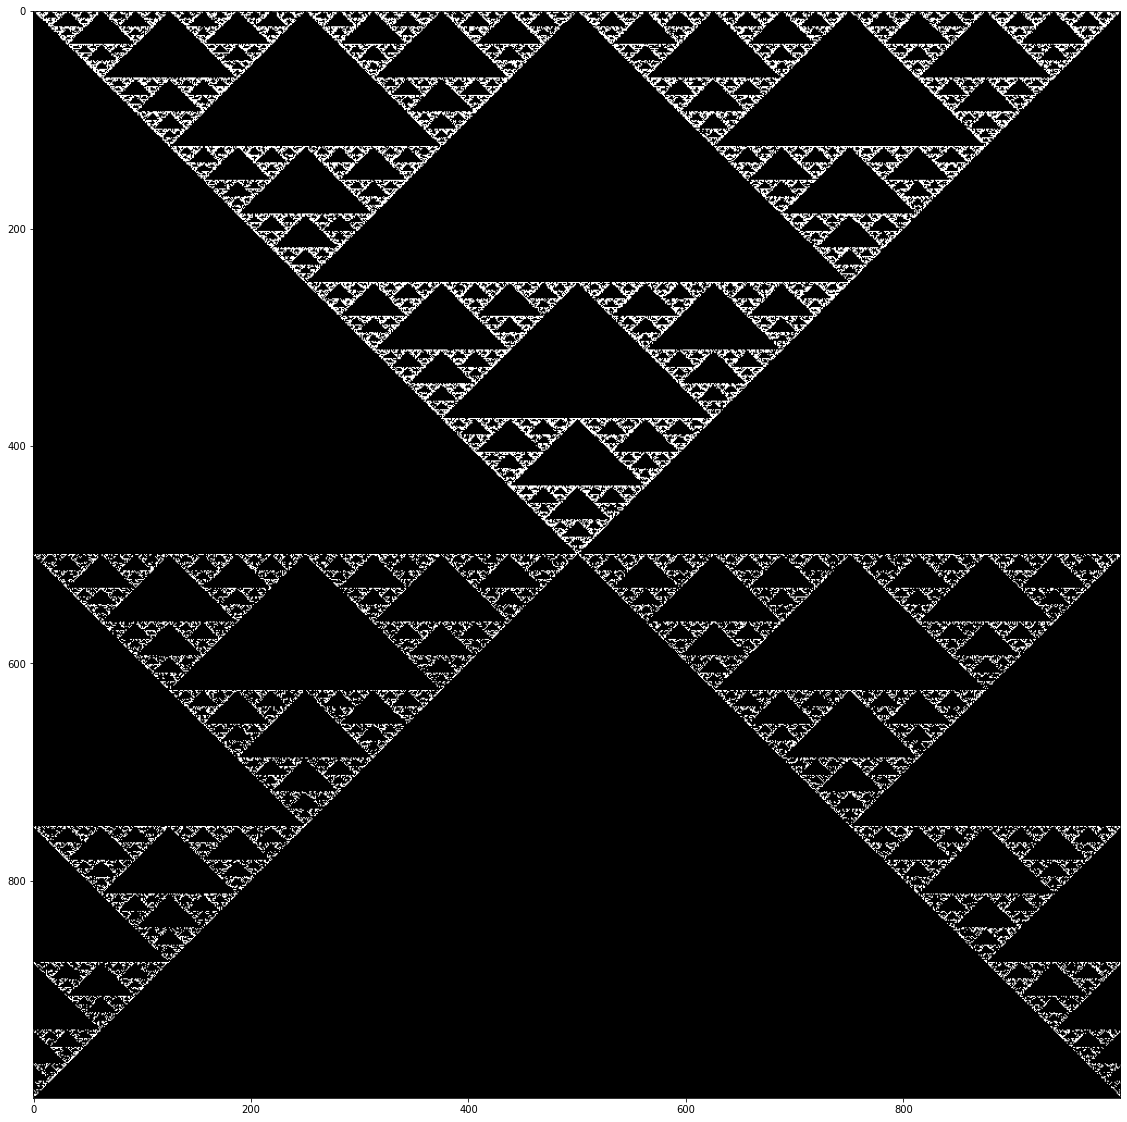

In [62]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
a  = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    im = int(z.real * 1000)
    re = int(z.imag * 1000)
    a[re, im] = 1
plt.figure(figsize=(20, 20))
plt.imshow(a, cmap = 'gray')

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
    Треугольник Серпинского можно строить с помощью метода хаоса, судя по википедии. Там выбирается произвольное число в отрезке от [0,1], и в зависимости от выбранного числа, смотрится, попало ли оно в отрезок [0, 1/3], [1/3, 2/3], [2/3, 1]. И по исходной точке и новому числу строится еще одна точка. Что - то похожее мы видим здесь, только лишь у нас происходит выбор одной из трех функций

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

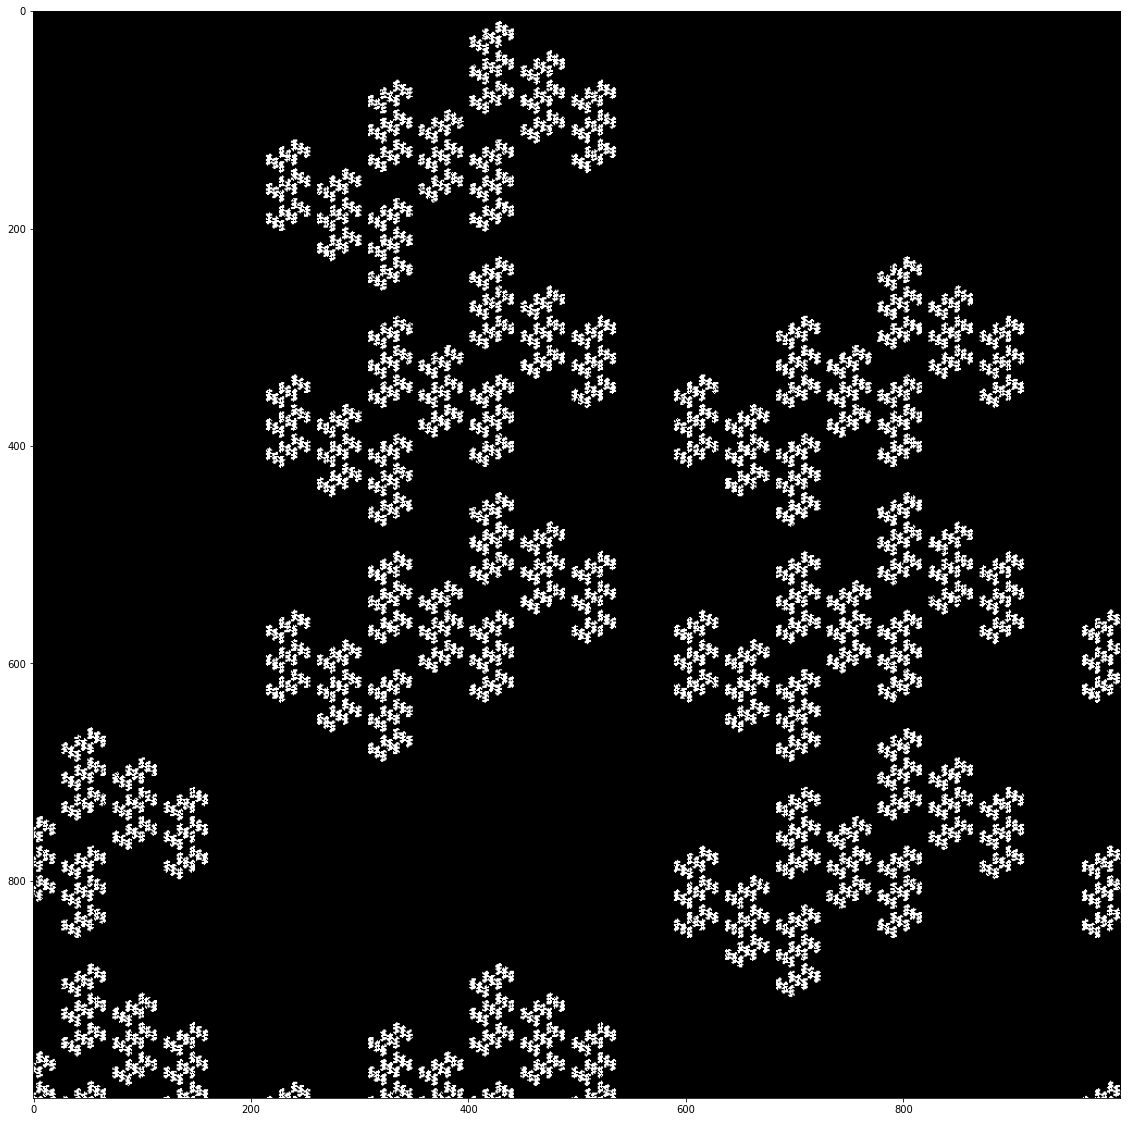

In [63]:
z = 1.+ 1.*1j
max_iter = 1000000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=math.pi/3)),
    (lambda t: shrink_rotate(t, 1. + 1.*1j, coef=0.5, angle=math.pi/3)),
    (lambda t: shrink_rotate(t, -1. + 1.*1j, coef=0.5, angle=math.pi/3)),
]

a  = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    im = int(z.real * 1000)
    re = int(z.imag * 1000)
    if 0 <= im < 1000 and 0 <= re < 1000:
        a[re, im] = 1
plt.figure(figsize=(20, 20))
plt.imshow(a, cmap = 'gray')

## Часть 6. Функции от матриц

Пусть $A$ -- некоторая квадратная матрица. В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать с помощью разложения в ряд, но мы пойдем другим путем. В этой задаче мы продемонстрируем другой метод:

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 201:

`A = np.array([[-1,1,2,-2],[-5,4,3,-4],[0,0,2,-1],[1,0,-1,1]])`

- у группы 202:

`A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])`

- у группы 204:

`A = np.array([[-6,-4,3,6],[1,-3,0,-1],[-1,-1,-5,0],[1,1,1,-4]])`

 

Посчитайте указанным способом:
 

1) $B = e^A$.

 

2) $S = \sin A$.

 

3) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

 

4) Поэкспериментируйте и посчитайте какую-нибудь ещё хитрую функцию от данной матрицы.

In [64]:
A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])
poly = np.poly(A) 
roots = np.roots(poly)
## несложно понять, что характеристический многочлен имеет вид (x - 1) * (x - 1) * (x + 1) * (x + 1)
## и мы знаем значения функции в 1 и -1. А также, значения производной функции в 1 и -1.
## ищем многочлен вида g(x) = ax^3 + bx^2 + cx + d
## что мы про него знаем:
## g(1) = e = a + b + c + d
## g(-1) = 1/e = -a + b - c + d
## g'(1) = e = 3a + 2b +c
## g'(-1) = 1/e = 3a - 2b + c
## Составляем матрицу с этой системой и вектор ответов:
slu = np.array([[1,1,1,1],[-1,1,-1,1],[3,2,1,0],[3,-2,1,0]])
vect = np.array([[math.e],[1 / math.e],[np.e],[np.e**(-1)] ])
res = sla.solve(slu, vect)
print(res)
##получив многочлен, находим его значение для матрицы A:
a1 = A
a2 = np.dot(A, A)
a3 = np.dot(a2, A)
answer = a3*res[0] + a2*res[1] + a1*res[2] + np.eye(4) * res[3] 
print(answer)
## сравним с библиотечной функцией:
print(sla.expm(A))

[[0.18393972]
 [0.5876006 ]
 [0.99126147]
 [0.95548004]]
[[ -2.12564869   8.29797123  -9.76948899 -13.73453488]
 [ -8.80897641  18.06746022 -17.55645503 -26.2223057 ]
 [  0.96051258   2.49352813  -3.96504589  -5.21180996]
 [ -5.8044431    5.8044431   -3.08616127  -5.8044431 ]]
[[ -2.12564869   8.29797123  -9.76948899 -13.73453488]
 [ -8.80897641  18.06746022 -17.55645503 -26.2223057 ]
 [  0.96051258   2.49352813  -3.96504589  -5.21180996]
 [ -5.8044431    5.8044431   -3.08616127  -5.8044431 ]]


In [65]:
A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])
poly = np.poly(A) 
roots = np.roots(poly)
## несложно понять, что характеристический многочлен имеет вид (x - 1) * (x - 1) * (x + 1) * (x + 1)
## и мы знаем значения функции в 1 и -1. А также, значения производной функции в 1 и -1.
## ищем многочлен вида g(x) = ax^3 + bx^2 + cx + d
## что мы про него знаем:
## g(1) = sin(1) = a + b + c + d
## g(-1) = sin(-1) = -a + b - c + d
## g'(1) = cos(1) = 3a + 2b +c
## g'(-1) = cos(-1) = 3a - 2b + c
## Составляем матрицу с этой системой и вектор ответов:
slu = np.array([[1,1,1,1],[-1,1,-1,1],[3,2,1,0],[3,-2,1,0]])
vect = np.array([[math.sin(1)],[math.sin(-1)],[math.cos(1)],[math.cos(-1)] ])
res = sla.solve(slu, vect)
print(res)
##получив многочлен, находим его значение для матрицы A:
a1 = A
a2 = np.dot(A, A)
a3 = np.dot(a2, A)
answer = a3*res[0] + a2*res[1] + a1*res[2] + np.eye(4) * res[3] 
print(answer)
## сравним с библиотечной функцией:
print(sla.sinm(A))

[[-0.15058434]
 [-0.        ]
 [ 0.99205532]
 [ 0.        ]]
[[ -4.33142503   5.11086096  -3.90618625  -6.19146557]
 [-10.82405928  11.00115785  -6.66973283 -12.32089609]
 [  1.49683681   0.1240701   -1.98411065  -0.66437241]
 [ -6.66973283   4.98679086  -1.08060461  -4.68562218]]
[[ -4.33142503   5.11086096  -3.90618625  -6.19146557]
 [-10.82405928  11.00115785  -6.66973283 -12.32089609]
 [  1.49683681   0.1240701   -1.98411065  -0.66437241]
 [ -6.66973283   4.98679086  -1.08060461  -4.68562218]]


In [66]:
from math import e as e
B = sla.expm(A)
poly = np.poly(B) 
roots = np.roots(poly)
## несложно понять, что характеристический многочлен имеет вид (x - e)*(x - e)*(x - 1/e)*(x - 1/e)
## и мы знаем значения функции в e и 1/e. А также, значения производной функции в e и 1/e.
## ищем многочлен вида g(x) = ax^3 + bx^2 + cx + d
## что мы про него знаем:
## g(e) = ln(e) = a * e^3 + b * e^2 + c * e + d
## g(1/e) = ln(1/e) = a * e^-3 + b * e^-2 + c * e^-1 + d
## g'(e) = ln'(e) = 3a*e^-2 + 2b*e^-1 +c
## g'(1/e) = ln'(1/e) = 3a*e^2 + 2b*e^1 + c
## Составляем матрицу с этой системой и вектор ответов:
slu = np.array([[e**3, e**2, e**1,1],
                [e**(-3),e**(-2),e**(-1),1],
                [3* e**2, 2*e, 1,0],
               [3* (e**-2),2*(e**-1),1,0]])
vect = np.array([[1],[-1],[1/e],[e] ])
res = sla.solve(slu, vect)
print(res)
##получив многочлен, находим его значение для матрицы B:
a1 = B
a2 = np.dot(B, B)
a3 = np.dot(a2, B)
answer = a3*res[0] + a2*res[1] + a1*res[2] + np.eye(4) * res[3] 
print(answer)
## сравним с исходной матрицей A:
print(A)

[[ 0.25058417]
 [-1.66001473]
 [ 3.83791377]
 [-2.19970686]]
[[ -3.   5.  -5.  -7.]
 [-10.  12.  -9. -15.]
 [  5.  -2.  -2.   1.]
 [ -9.   7.  -2.  -7.]]
[[ -3   5  -5  -7]
 [-10  12  -9 -15]
 [  5  -2  -2   1]
 [ -9   7  -2  -7]]


In [67]:
## не очень оригинально, но найдем cos(A)
A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])
poly = np.poly(A) 
roots = np.roots(poly)
## несложно понять, что характеристический многочлен имеет вид (x - 1) * (x - 1) * (x + 1) * (x + 1)
## и мы знаем значения функции в 1 и -1. А также, значения производной функции в 1 и -1.
## ищем многочлен вида g(x) = ax^3 + bx^2 + cx + d
## что мы про него знаем:
## g(1) = cos(1) = a + b + c + d
## g(-1) = cos(-1) = -a + b - c + d
## g'(1) = -sin(1) = 3a + 2b +c
## g'(-1) = -sin(-1) = 3a - 2b + c
## Составляем матрицу с этой системой и вектор ответов:
slu = np.array([[1,1,1,1],[-1,1,-1,1],[3,2,1,0],[3,-2,1,0]])
vect = np.array([[math.cos(1)],[math.cos(-1)],[math.sin(-1)],[math.sin(1)] ])
res = sla.solve(slu, vect)
print(res)
##получив многочлен, находим его значение для матрицы A:
a1 = A
a2 = np.dot(A, A)
a3 = np.dot(a2, A)
answer = a3*res[0] + a2*res[1] + a1*res[2] + np.eye(4) * res[3] 
print(answer)
## сравним с библиотечной функцией:
print(sla.cosm(A))

[[ 0.        ]
 [-0.42073549]
 [ 0.        ]
 [ 0.9610378 ]]
[[ 2.22324428 -2.52441295  2.52441295  4.20735492]
 [ 0.         -1.98411065  4.20735492  5.89029689]
 [ 5.89029689 -5.04882591  3.06471526  5.89029689]
 [-4.20735492  2.52441295  0.         -1.14263966]]
[[ 2.22324428e+00 -2.52441295e+00  2.52441295e+00  4.20735492e+00]
 [-3.90798505e-14 -1.98411065e+00  4.20735492e+00  5.89029689e+00]
 [ 5.89029689e+00 -5.04882591e+00  3.06471526e+00  5.89029689e+00]
 [-4.20735492e+00  2.52441295e+00 -2.15965748e-14 -1.14263966e+00]]


## Часть 7 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ &mdash; матрица размера $n\times n$, а $B$ &mdash; матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и одинаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000; например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000; например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

217 µs ± 3.91 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
124 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.55 ms ± 479 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.58 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.83 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.52 ms ± 2.37 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.19 ms ± 2.16 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.31 ms ± 3.13 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.5 ms ± 3.12 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.2 ms ± 4.16 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
38.8 ms ± 7.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
42 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
110 ms ± 17.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
142 ms ± 21.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


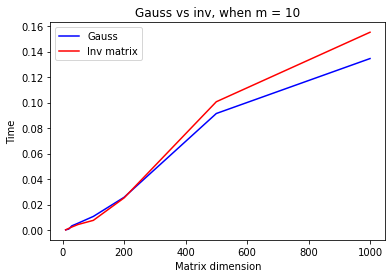

In [68]:
def Gauss(A, B):
    return sla.solve(A, B)
    
def inv(A, B):
    A1 = sla.inv(A)
    return np.dot(A1, B)
    
lib_times = []
my_times = []

dimensions = [10,20,30, 50, 100, 200, 500, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    B = np.random.rand(dim, 10)
    res_lib = %timeit -o Gauss(A, B)
    lib_times.append(res_lib.best)
    res_my = %timeit -o inv(A, B)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Gauss')
plt.plot(dimensions, my_times, color='red', label='Inv matrix')
plt.title('Gauss vs inv, when m = 10')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

14.3 ms ± 2.5 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.1 ms ± 6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
22.6 ms ± 4.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.3 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
23.2 ms ± 3.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
20.5 ms ± 3.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.6 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.1 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
23.3 ms ± 4.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
27.3 ms ± 3.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
28 ms ± 4.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
25.2 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
31.5 ms ± 3.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
29.9 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


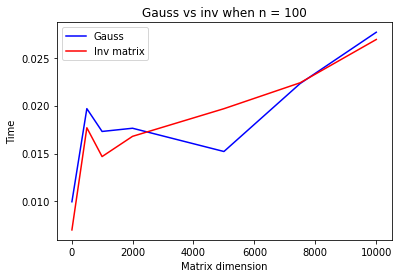

In [70]:
lib_times = []
my_times = []

dimensions = [10, 500, 1000,2000,5000, 7500, 10000]
for dim in dimensions:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, dim)
    res_lib = %timeit -o Gauss(A, B)
    lib_times.append(res_lib.best)
    res_my = %timeit -o inv(A, B)
    my_times.append(res_my.best)    


plt.plot(dimensions, lib_times, color='blue', label='Gauss')
plt.plot(dimensions, my_times, color='red', label='Inv matrix')
plt.title('Gauss vs inv when n = 100')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Как мы видим, при увеличивающейся величины размера матрицы, от которой нужно брать обратную -- функция поиска обратной заметно проигрывает, наверно это происходит из-за того, что для поиска обратной применен какой-то алгоритм, который хорошо работает на маленьких матрицах - но плох на больших. Метод Гаусса же, работает всегда за n^3. (считаем, что основное время идет на это, будем считать, что умножаются матрицы быстро.)

Если же размер матрицы, от которой надо брать обратную фиксирован и равен 100, то делает это быстрее функция поиска обратной. Не то, чтобы результаты сильно отличаются, основное время у нас будет занимать умножение этих двух матриц. 

Однако же, colab работает прямее моего ноутбука, вставлю картинки оттуда:
Ну или мне так не везет с матрицами...
https://drive.google.com/drive/folders/1-hAFsDF7Di1GVWE7TaOOE33za6voLJpC?usp=sharing